<a href="https://colab.research.google.com/github/ShubhamVermaDev9/ML-projects/blob/main/VGG16_Pneumonia_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VGG16-Pneumonia-Classifier


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


Sp

In [6]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Adding definition for test_datagen as it was not defined in the current scope.
# It is originally defined in cell SN0qay_jPEfD, which should ideally be executed first.
test_datagen = ImageDataGenerator(rescale=1./255)

# Adding definition for test_dir from cell sOKpnsmNSfzT
base_dir = os.path.join(path, "chest_xray")
test_dir = os.path.join(base_dir, "test")

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


test_gen.reset()


y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int)


y_true = test_gen.classes


class_names = list(test_gen.class_indices.keys())


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n" + "="*50)
print("PERFORMANCE METRICS")
print("="*50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


tn, fp, fn, tp = cm.ravel()

print("\n" + "="*50)
print("PER-CLASS METRICS FROM CONFUSION MATRIX")
print("="*50)
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


print("\n" + "="*50)
print("ADDITIONAL METRICS")
print("="*50)
print(f"Sensitivity/Recall: {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")


cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

Found 624 images belonging to 2 classes.


NameError: name 'model' is not defined

In [ ]:
import os

base_dir = os.path.join(path, "chest_xray")

train_dir = os.path.join(base_dir, "train")
test_dir  = os.path.join(base_dir, "test")
val_dir   = os.path.join(base_dir, "val")

print(os.listdir(train_dir))

['PNEUMONIA', 'NORMAL']


# **preprocessing.image **

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


TRAIN Set Distribution:
  NORMAL: 1341 images
  PNEUMONIA: 3875 images

TEST Set Distribution:
  NORMAL: 234 images
  PNEUMONIA: 390 images

VAL Set Distribution:
  NORMAL: 8 images
  PNEUMONIA: 8 images


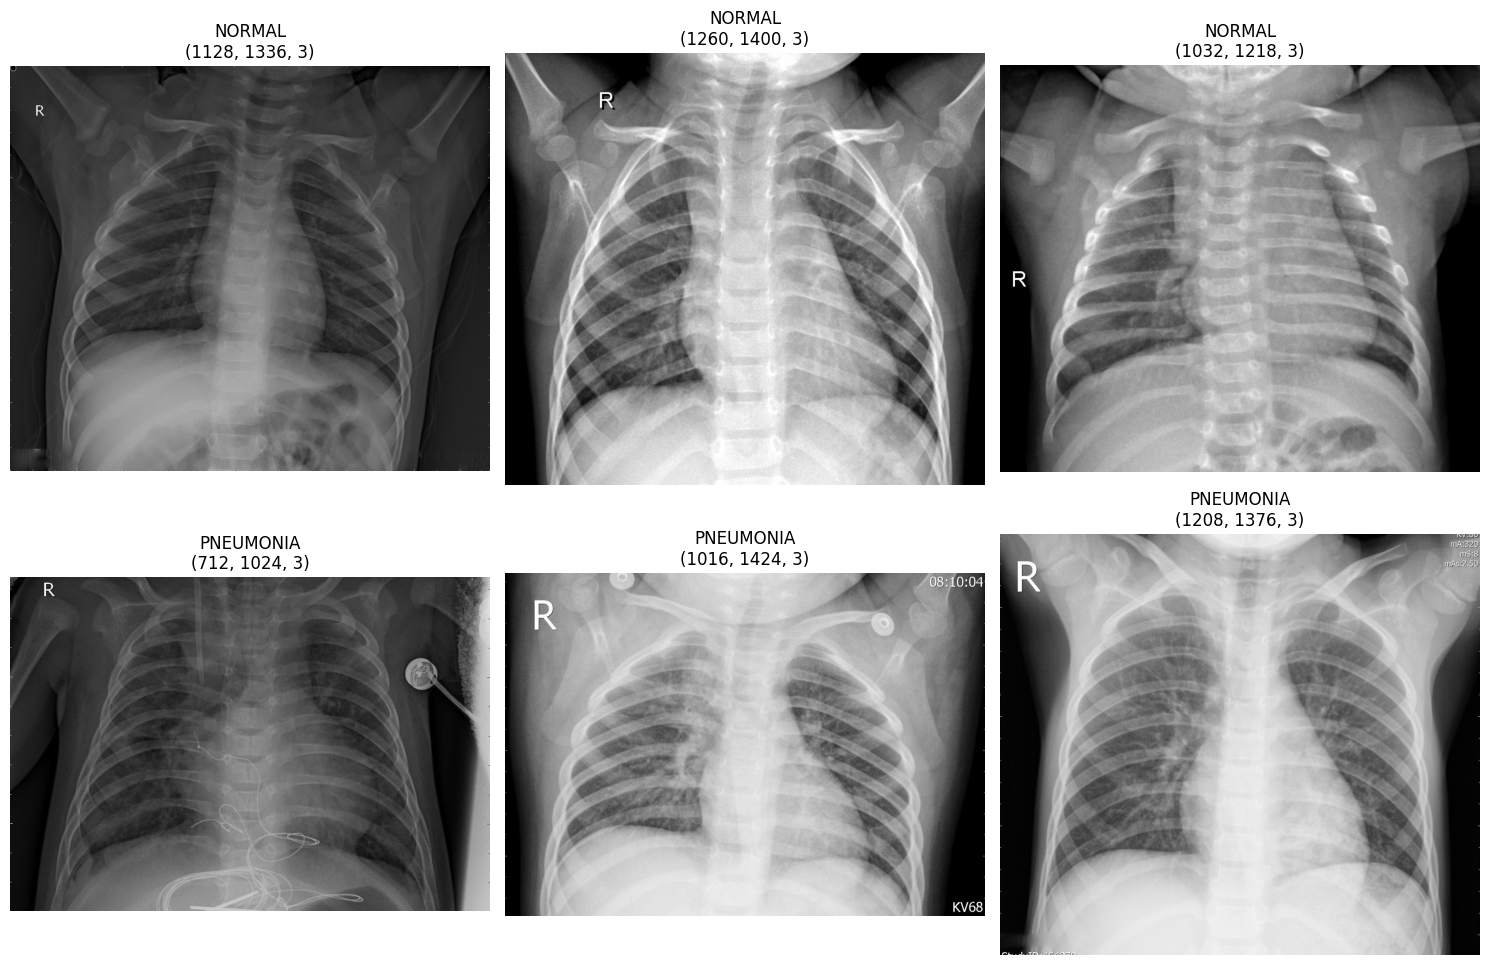

In [ ]:
!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import cv2

# Check class distribution
def analyze_dataset(base_path):
    sets = ['train', 'test', 'val']
    for set_name in sets:
        set_path = Path(base_path) / set_name
        print(f"\n{set_name.upper()} Set Distribution:")
        for class_name in ['NORMAL', 'PNEUMONIA']:
            class_path = set_path / class_name
            if class_path.exists():
                num_images = len(list(class_path.glob('*.jpeg')))
                print(f"  {class_name}: {num_images} images")
            else:
                print(f"  {class_name}: Directory not found")

analyze_dataset(base_dir)

# Visualize sample images
def visualize_samples(base_path, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    # Get random samples
    for i, class_name in enumerate(['NORMAL', 'PNEUMONIA']):
        class_path = Path(base_path) / 'train' / class_name
        image_files = list(class_path.glob('*.jpeg'))[:3]

        for j, img_path in enumerate(image_files):
            idx = i*3 + j
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[idx].imshow(img)
            axes[idx].set_title(f'{class_name}\n{img.shape}')
            axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

visualize_samples(base_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
import numpy as np

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Parameters
IMG_SIZE = (224, 224)  # VGG16 input size
BATCH_SIZE = 32

# Create data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Using 20% of train as validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_dir = Path(base_dir) / 'train'
test_dir = Path(base_dir) / 'test'
val_dir = Path(base_dir) / 'val'

# Train generator (80% of training data)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights for handling imbalance: {class_weight_dict}")


def build_vgg16_model():
    base_model = applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    base_model.trainable = False


    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model, base_model


model, base_model = build_vgg16_model()
model.summary()

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Class weights for handling imbalance: {0: np.float64(1.9445479962721341), 1: np.float64(0.6730645161290323)}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# **# Fine-tune**

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_pneumonia_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]


print("Phase 1: Training with frozen VGG16 base...")
history_frozen = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)


print("\nPhase 2: Fine-tuning last 4 blocks of VGG16...")
base_model.trainable = True


for layer in base_model.layers[:11]:
    layer.trainable = False
for layer in base_model.layers[11:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

# Fine-tune
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=15,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Phase 1: Training with frozen VGG16 base...


NameError: name 'model' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Evaluate on test set
print("\nEvaluating on test set...")
test_results = model.evaluate(test_generator)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test AUC: {test_results[4]:.4f}")

# Plot training history
def plot_history(history1, history2, title1='Frozen Base', title2='Fine-tuned'):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0,0].plot(history1.history['accuracy'], label=f'{title1} Train')
    axes[0,0].plot(history1.history['val_accuracy'], label=f'{title1} Val')
    axes[0,0].plot(range(len(history1.history['accuracy']),
                      len(history1.history['accuracy'])+len(history2.history['accuracy'])),
                   history2.history['accuracy'], label=f'{title2} Train')
    axes[0,0].plot(range(len(history1.history['val_accuracy']),
                         len(history1.history['val_accuracy'])+len(history2.history['val_accuracy'])),
                   history2.history['val_accuracy'], label=f'{title2} Val')
    axes[0,0].set_title('Model Accuracy')
    axes[0,0].set_ylabel('Accuracy')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # Loss
    axes[0,1].plot(history1.history['loss'], label=f'{title1} Train')
    axes[0,1].plot(history1.history['val_loss'], label=f'{title1} Val')
    axes[0,1].plot(range(len(history1.history['loss']),
                        len(history1.history['loss'])+len(history2.history['loss'])),
                   history2.history['loss'], label=f'{title2} Train')
    axes[0,1].plot(range(len(history1.history['val_loss']),
                        len(history1.history['val_loss'])+len(history2.history['val_loss'])),
                   history2.history['val_loss'], label=f'{title2} Val')
    axes[0,1].set_title('Model Loss')
    axes[0,1].set_ylabel('Loss')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].legend()
    axes[0,1].grid(True)

    # Precision & Recall
    axes[1,0].plot(history1.history['precision'], label=f'{title1} Precision')
    axes[1,0].plot(history1.history['recall'], label=f'{title1} Recall')
    axes[1,0].plot(range(len(history1.history['precision']),
                        len(history1.history['precision'])+len(history2.history['precision'])),
                   history2.history['precision'], label=f'{title2} Precision')
    axes[1,0].plot(range(len(history1.history['recall']),
                        len(history1.history['recall'])+len(history2.history['recall'])),
                   history2.history['recall'], label=f'{title2} Recall')
    axes[1,0].set_title('Precision & Recall')
    axes[1,0].set_ylabel('Score')
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].legend()
    axes[1,0].grid(True)

    # AUC
    axes[1,1].plot(history1.history['auc'], label=f'{title1} AUC')
    axes[1,1].plot(history1.history['val_auc'], label=f'{title1} Val AUC')
    axes[1,1].plot(range(len(history1.history['auc']),
                        len(history1.history['auc'])+len(history2.history['auc'])),
                   history2.history['auc'], label=f'{title2} AUC')
    axes[1,1].plot(range(len(history1.history['val_auc']),
                        len(history1.history['val_auc'])+len(history2.history['val_auc'])),
                   history2.history['val_auc'], label=f'{title2} Val AUC')
    axes[1,1].set_title('AUC Score')
    axes[1,1].set_ylabel('AUC')
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].legend()
    axes[1,1].grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history_frozen, history_finetune)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes,
                           target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize predictions
def visualize_predictions(num_samples=8):
    test_generator.reset()
    batch = next(test_generator)
    images, labels = batch
    preds = model.predict(images)

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.ravel()

    for i in range(num_samples):
        axes[i].imshow(images[i])
        true_label = 'NORMAL' if labels[i] == 0 else 'PNEUMONIA'
        pred_label = 'NORMAL' if preds[i] < 0.5 else 'PNEUMONIA'
        confidence = preds[i][0] if preds[i] >= 0.5 else 1 - preds[i][0]
        color = 'green' if true_label == pred_label else 'red'

        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2%}',
                         color=color, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions()

In [ ]:
# Check GPU availability
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

# Optimize data loading (Colab-specific)
AUTOTUNE = tf.data.AUTOTUNE

# Convert to tf.data.Dataset for better performance
def create_tf_dataset(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_signature=(
            tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.float32)
        )
    )
    return dataset.prefetch(AUTOTUNE)

# Use this for potentially faster training
# train_dataset = create_tf_dataset(train_generator)

# Save model for future use
model.save('pneumonia_vgg16_model.h5')
print("Model saved as 'pneumonia_vgg16_model.h5'")

# To download from Colab to your computer:
from google.colab import files
files.download('pneumonia_vgg16_model.h5')